In [1]:
# Decision Tree Model #
# First i start with importing all the necessary libraries to build the model # 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt 
from sklearn.metrics import precision_score , recall_score,f1_score,accuracy_score

In [8]:
# Then i read the dataset from the csv file to make it ready for the training #
data = pd.read_csv('pre_advertisment(after).csv')
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Above average
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Average
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Above average
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Above average
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Average
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Below average
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Below average
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Average


In [4]:
# Replacing varying numerical values for Daily Internet Usage to 3 catrgories to make it clearer 
# and then i replace it with numerical values for training 
data['Internet usage bucket'].replace(['Below average', 'Average', 'Above average'],[-1, 0, 1], inplace=True)
data.drop(['Unnamed: 0'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,-1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,-1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0


In [28]:
data.to_csv(r'C:\Users\96650\Desktop\pre_advertisment(after2).csv')

In [6]:
# Here i count the two classes that we have in the dataset to see if we need to stratify the data spliting and 
# the result is that the two classes are equal and we dont need to stratify
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [4]:
# Here i choose the feature columns and the target column
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket'] 
x=data[feature_cols] #feature columns
y=data['Clicked on Ad'] #target column

# spliting the dataset 30% for testing and 70% for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

# Create the DecisionTreeClassifier object and limitting the depth of the tree to 5 levels  
clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5) 

#train decision tree classifier (building the model)
clf = clf.fit(x_train,y_train)

#predict the results of the test dataset
y_pred = clf.predict(x_test)

#I used the fit() function that trains the algorithm on the training data. Then, i called the decision tree 
# classifier with predict() function which allow me to predict the labels of the data values on the basis of
# the trained model. The parameter of predict() function is the data to be tested.

In [10]:
# here i calculate the important statistics accuracy,recall,precision and it is considered high values if we compare it 
# with other models
accuracy = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
f1 = metrics.f1_score(y_test,y_pred,average='binary')*100

print('Accuracy: %.2f'% accuracy,'%')
print('Recall: %.2f'% recall,'%')
print('Precision: %.2f'% precision,'%')
print('F1 score: %.2f'% f1,'%') 

Accuracy: 95.00 %
Recall: 91.56 %
Precision: 98.60 %
F1 score: 94.95 %


In [102]:
# In the evaluation method, we used 5-cross validation by calling cross_val_score. and as we see the accuracy values 
# are high and we can say that its a good model 
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x,y,cv=5)
print ('cross validation score: ', score)

cross validation score:  [0.97  0.945 0.975 0.935 0.945]


In [103]:
# After training the model on the data we calculate the accuracy of train and test data. By
# passing (x_train, y_train) and (x_test, y_test) to score() function.
# as we can see below the accuracy of both training and testing and it is highre than other 2 models that we build
trainAcc = clf.score(x_train,y_train)*100
testAcc = clf.score(x_test,y_test)*100
print('Training Accuracy: %.2f'% trainAcc, '%')
print('Testing Accuracy: %.2f'% testAcc, '%')

Training Accuracy: 98.43 %
Testing Accuracy: 93.67 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

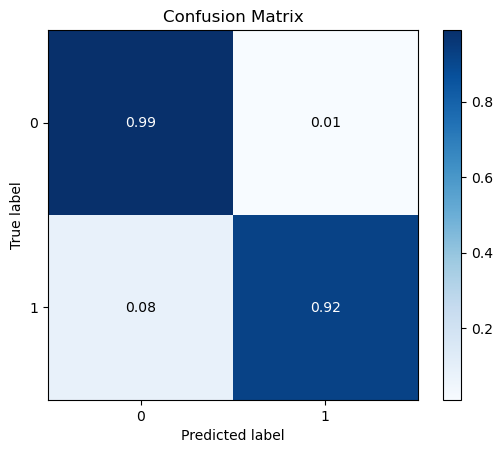

In [6]:
# drawing the confusion matrix as a evaluation method
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize =True ,title='Confusion Matrix')

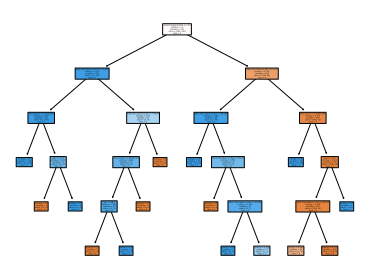

In [12]:
# in our dataser 0=No and 1=Yes, as we see in the above matrix the TP:0.92 TN:0.99 FP:0.01 FN:0.08 
# as we notice that te FP and FN rate are very low which is a good thing that our model doesn't clasify things wrongly

# Here is a plot for the tree
from sklearn import tree
%config InlineBackend.figure_format = 'svg'
plot = tree.plot_tree(clf, feature_names = feature_cols , class_names = '01', filled = True)

_______________________________________________________________________________
Linear Regression 

It ranks among the most used machine learning regression algorithms. The output variables (future values) are predicted using a significant variable from the data set. We have chosen the linear regression because it is used when the labels on a continuous dataset are continuous.

In [29]:
data = pd.read_csv('pre_advertisment(after2).csv')
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,1
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,1
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,1
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1,0
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1,-1
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1,-1
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0,0


Any machine learning algorithm can be used after preprocessing the dataset in phase #1; the linear regression algorithm starts by splitting the variables into features and the target variable which is the class label. The algorithm was trained using the training data via the fit() method. Then, we called the linear regression with predict() function which allow us to predict the labels of the data values on the basis of the trained model. The parameter of predict() function is the data to be tested.

In [22]:
#Split the dataset to x and y

feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket']
x = data[feature_cols]
y = data['Clicked on Ad']

#Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

#Build the train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [76]:
#Predict the response for test set
y_pred = model.predict(x_test)

After applying the Linear regression algorithm, we calculate the Mean squared error of train and test data by calling mean_squared_error function.

In [26]:
from sklearn.metrics import mean_squared_error
print("Train Error: ", mean_squared_error(y_train, model.predict(x_train)))

Train Error:  0.050595052794030176


In [27]:
print("Test Error: ", mean_squared_error(y_test, model.predict(x_test)))

Test Error:  0.039157395801301134


When applying the mean_squared_error() function on the training and testing data we can see that the training error is 0.05 and the testing error is 0.03 which means that the training error is higher than the testing error which leads us to a conclusion that our model's performance is an Unknown fit.
_______________________________________________________________________________

After training the model on the data we pass (x_train, y_train) and (x_test, y_test) to score() function in order to calculate the accuracy of train and test data. Which obviously will be low, since there is high test and train error.

In [30]:
#Calculate the Training and Testing accuracy 
print("Training accuracy: ", model.score(x_train, y_train)*100 , '%')
print("Testing accuracy: ", model.score(x_test, y_test)*100, '%')

Training accuracy:  79.75577908973416 %
Testing accuracy:  84.25991526427448 %


The Training Accuracy for our model is 79.75% and the Testing Accuracy is 84%, So we can see that the accuracy of our model is technically high which is a good thing.

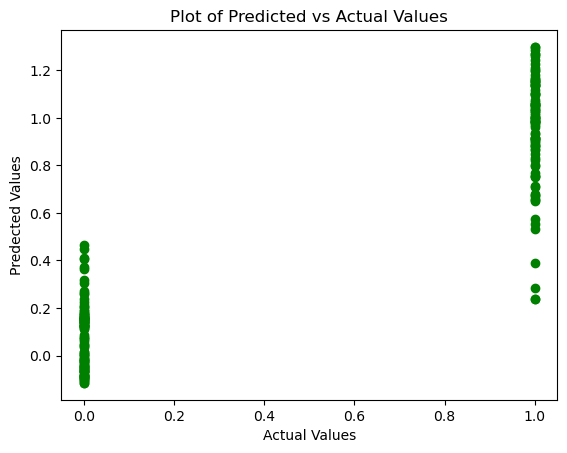

In [80]:
from matplotlib import pyplot as plt

y_true = y_test
plt.scatter(y_true, y_pred,color='g')
plt.title("Plot of Predicted vs Actual Values")
plt.xlabel('Actual Values')
plt.ylabel('Predected Values')
plt.show()

Our actual values does actually fall into only 1 and 0 values and that's obtained in the graph above where our target was "Clicked on" which contains only a 0 if it’s no and 1 if it’s yes, and the yaxis which is the predected values do actually fall in between 0 and 1 because it’s a predection. 
We can see that when the actual value is 0 the predeted values are very low and mainly fall in between 0 to 0.5, On the other hand when the actual value is 1 the predected values are high and fall largerly in between 0.6 to 1; That means that our model is predecting right.
_______________________________________________________________________________

In [81]:
from sklearn import svm

# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train,y_train)
# classifier_svm = svm.SVC(kernel='rbf',  probability=True, random_state=0).fit(x_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(x_test, y_test))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(x_test)
ConfusionMatrix = metrics.confusion_matrix(y_test,predicted_svm)
print(ConfusionMatrix)

print("\nClassification_report of SVM classifier:")
print(metrics.classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

from sklearn import metrics, svm


## Calculate Sensitivity(Recall) 
# (True Positive recognition rate) TP/(TP+FN)
Senstivity = ConfusionMatrix[1,1] / ( ConfusionMatrix[1,0] + ConfusionMatrix[1,1] )
print('Senstivity(or Recall):%.2f'%Senstivity,'%')

## Calculate Specificity 
## (True Nregative recognition rate) TN/(TN+FP)
Specificity = ConfusionMatrix[0,0] / ( ConfusionMatrix[0,0] + ConfusionMatrix[0,1] )
print('Specificity:%.2f'% Specificity,'%')

## Calculate Precision 
Precision = metrics.precision_score(y_test,predicted_svm, average="micro")
print('Precision:%.2f'%Precision,'%')

SVM accuracy: 0.95

Confusion matrix of the SVM classifier:
[[103   4]
 [  6  87]]

Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.96      0.94      0.95        93

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

----------------------------------------------------------------------------
Senstivity(or Recall):0.94 %
Specificity:0.96 %
Precision:0.95 %


- Accuracy is the percentage of test dataset that are CORRECTLY classified

Confusion Matrix : 

TN (143 classified as NOT clicked correctly) 

FP (only 3 classified wrongly as clicked when it is not) 

FN (only 28 classified wrongly as Not clicked when it Clicked) 

TP (126 classified as Clicked correctly) 

_______________________________________________________________________________

Classification report provides comperhensive summary of Precision, Recall, f1 score for each class

The support column provides number of samples of each class, for the class label 1(Clicked) is 154 and for the class label 0 is 146

- the pricision of class label 1 is near from 1 and that indicates the very LOW FalsePositive rate (only 3 classified as clicked when it is not) 




Macro Avg ( Note* Doean't take class imbalance into account) is the average Precision, recall, f1-score between calsses

meanwhile, in weighted average ; each metric is calculated With respect to how many samples there are in each class.

* This metric will favour the majority class (give a high value when one class out performs another due to having more samples)

In [82]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)

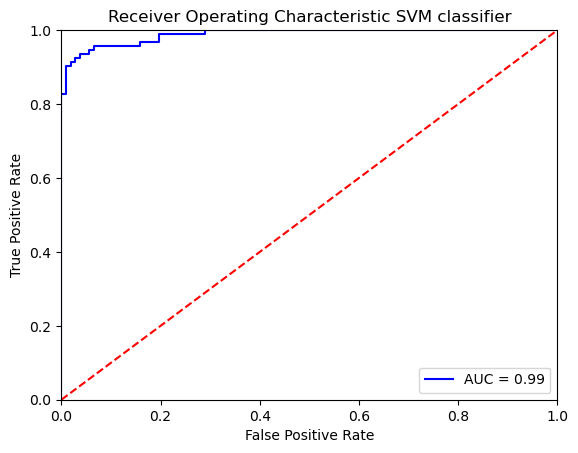

In [83]:
import matplotlib.pyplot as plt  

# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Comparing the 3 models that we build :